# SuperStore Date Analysis

## Main Analysis Questions
### 1 Which product categories generate the most sales?

### 2 Which cities/states buy the most?

### 3 Which months have highest and lowest sales (seasonal trend)?

### 4 Which products are profitable vs unprofitable?

### 5 Which customer segment buys most?

In [1]:
import pandas as pd
import numpy as np
import seaborn as sna
import matplotlib.pyplot as plt

## Read csv file

In [2]:
df = pd.read_csv('superstore.csv/superstore.csv')
df.head()

,Category,City,Country,Customer.ID,Customer.Name,Discount,Market,记录数,Order.Date,Order.ID,...,Sales,Segment,Ship.Date,Ship.Mode,Shipping.Cost,State,Sub.Category,Year,Market2,weeknum
0,Office Supplies,Los Angeles,United States,LS-172304,Lycoris Saunders,0.0,US,1,2011-01-07 00:00:00.000,CA-2011-130813,...,19,Consumer,2011-01-09 00:00:00.000,Second Class,4.37,California,Paper,2011,North America,2
1,Office Supplies,Los Angeles,United States,MV-174854,Mark Van Huff,0.0,US,1,2011-01-21 00:00:00.000,CA-2011-148614,...,19,Consumer,2011-01-26 00:00:00.000,Standard Class,0.94,California,Paper,2011,North America,4
2,Office Supplies,Los Angeles,United States,CS-121304,Chad Sievert,0.0,US,1,2011-08-05 00:00:00.000,CA-2011-118962,...,21,Consumer,2011-08-09 00:00:00.000,Standard Class,1.81,California,Paper,2011,North America,32
3,Office Supplies,Los Angeles,United States,CS-121304,Chad Sievert,0.0,US,1,2011-08-05 00:00:00.000,CA-2011-118962,...,111,Consumer,2011-08-09 00:00:00.000,Standard Class,4.59,California,Paper,2011,North America,32
4,Office Supplies,Los Angeles,United States,AP-109154,Arthur Prichep,0.0,US,1,2011-09-29 00:00:00.000,CA-2011-146969,...,6,Consumer,2011-10-03 00:00:00.000,Standard Class,1.32,California,Paper,2011,North America,40


## Removed coulmns we don't need 

In [3]:
columns_to_drop = ['Row.ID', '记录数', 'Market2', 'weeknum']

df = df.drop(columns=columns_to_drop, errors='ignore')

df.head()


,Category,City,Country,Customer.ID,Customer.Name,Discount,Market,Order.Date,Order.ID,Order.Priority,...,Quantity,Region,Sales,Segment,Ship.Date,Ship.Mode,Shipping.Cost,State,Sub.Category,Year
0,Office Supplies,Los Angeles,United States,LS-172304,Lycoris Saunders,0.0,US,2011-01-07 00:00:00.000,CA-2011-130813,High,...,3,West,19,Consumer,2011-01-09 00:00:00.000,Second Class,4.37,California,Paper,2011
1,Office Supplies,Los Angeles,United States,MV-174854,Mark Van Huff,0.0,US,2011-01-21 00:00:00.000,CA-2011-148614,Medium,...,2,West,19,Consumer,2011-01-26 00:00:00.000,Standard Class,0.94,California,Paper,2011
2,Office Supplies,Los Angeles,United States,CS-121304,Chad Sievert,0.0,US,2011-08-05 00:00:00.000,CA-2011-118962,Medium,...,3,West,21,Consumer,2011-08-09 00:00:00.000,Standard Class,1.81,California,Paper,2011
3,Office Supplies,Los Angeles,United States,CS-121304,Chad Sievert,0.0,US,2011-08-05 00:00:00.000,CA-2011-118962,Medium,...,2,West,111,Consumer,2011-08-09 00:00:00.000,Standard Class,4.59,California,Paper,2011
4,Office Supplies,Los Angeles,United States,AP-109154,Arthur Prichep,0.0,US,2011-09-29 00:00:00.000,CA-2011-146969,High,...,1,West,6,Consumer,2011-10-03 00:00:00.000,Standard Class,1.32,California,Paper,2011


## check null value in dataset

In [4]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Category        51290 non-null  object 
 1   City            51290 non-null  object 
 2   Country         51290 non-null  object 
 3   Customer.ID     51290 non-null  object 
 4   Customer.Name   51290 non-null  object 
 5   Discount        51290 non-null  float64
 6   Market          51290 non-null  object 
 7   Order.Date      51290 non-null  object 
 8   Order.ID        51290 non-null  object 
 9   Order.Priority  51290 non-null  object 
 10  Product.ID      51290 non-null  object 
 11  Product.Name    51290 non-null  object 
 12  Profit          51290 non-null  float64
 13  Quantity        51290 non-null  int64  
 14  Region          51290 non-null  object 
 15  Sales           51290 non-null  int64  
 16  Segment         51290 non-null  object 
 17  Ship.Date       51290 non-null 

Category          0
City              0
Country           0
Customer.ID       0
Customer.Name     0
Discount          0
Market            0
Order.Date        0
Order.ID          0
Order.Priority    0
Product.ID        0
Product.Name      0
Profit            0
Quantity          0
Region            0
Sales             0
Segment           0
Ship.Date         0
Ship.Mode         0
Shipping.Cost     0
State             0
Sub.Category      0
Year              0
dtype: int64

In [5]:
df.head()

,Category,City,Country,Customer.ID,Customer.Name,Discount,Market,Order.Date,Order.ID,Order.Priority,...,Quantity,Region,Sales,Segment,Ship.Date,Ship.Mode,Shipping.Cost,State,Sub.Category,Year
0,Office Supplies,Los Angeles,United States,LS-172304,Lycoris Saunders,0.0,US,2011-01-07 00:00:00.000,CA-2011-130813,High,...,3,West,19,Consumer,2011-01-09 00:00:00.000,Second Class,4.37,California,Paper,2011
1,Office Supplies,Los Angeles,United States,MV-174854,Mark Van Huff,0.0,US,2011-01-21 00:00:00.000,CA-2011-148614,Medium,...,2,West,19,Consumer,2011-01-26 00:00:00.000,Standard Class,0.94,California,Paper,2011
2,Office Supplies,Los Angeles,United States,CS-121304,Chad Sievert,0.0,US,2011-08-05 00:00:00.000,CA-2011-118962,Medium,...,3,West,21,Consumer,2011-08-09 00:00:00.000,Standard Class,1.81,California,Paper,2011
3,Office Supplies,Los Angeles,United States,CS-121304,Chad Sievert,0.0,US,2011-08-05 00:00:00.000,CA-2011-118962,Medium,...,2,West,111,Consumer,2011-08-09 00:00:00.000,Standard Class,4.59,California,Paper,2011
4,Office Supplies,Los Angeles,United States,AP-109154,Arthur Prichep,0.0,US,2011-09-29 00:00:00.000,CA-2011-146969,High,...,1,West,6,Consumer,2011-10-03 00:00:00.000,Standard Class,1.32,California,Paper,2011


____

### Q#1 Which product categories generate the most sales

In [25]:
df['Order.Date'] = pd.to_datetime(df['Order.Date'], errors='coerce')
df['Ship.Date'] = pd.to_datetime(df['Ship.Date'], errors='coerce')


In [10]:
df.groupby('Category')['Sales'].sum().sort_values(ascending=False)


Category
Technology         4744691
Furniture          4110884
Office Supplies    3787330
Name: Sales, dtype: int64

In [11]:
df.groupby('Category')['Profit'].sum().sort_values(ascending=False)

Category
Technology         663778.73318
Office Supplies    518473.83430
Furniture          285204.72380
Name: Profit, dtype: float64

In [15]:
df.groupby('Sub.Category')['Profit'].sum().sort_values()


Sub.Category
Tables         -64083.38870
Fasteners       11525.42410
Labels          15010.51200
Supplies        22583.26310
Envelopes       29601.11630
Furnishings     46967.42550
Art             57953.91090
Machines        58867.87300
Paper           59207.68270
Binders         72449.84600
Storage        108461.48980
Accessories    129626.30620
Chairs         140396.26750
Appliances     141680.58940
Bookcases      161924.41950
Phones         216717.00580
Copiers        258567.54818
Name: Profit, dtype: float64

### Sales by Product Category

This chart shows the total sales generated by each product category.  
We can see that **Technology** generates the highest revenue, followed by **Furniture**, while **Office Supplies** has the lowest sales.


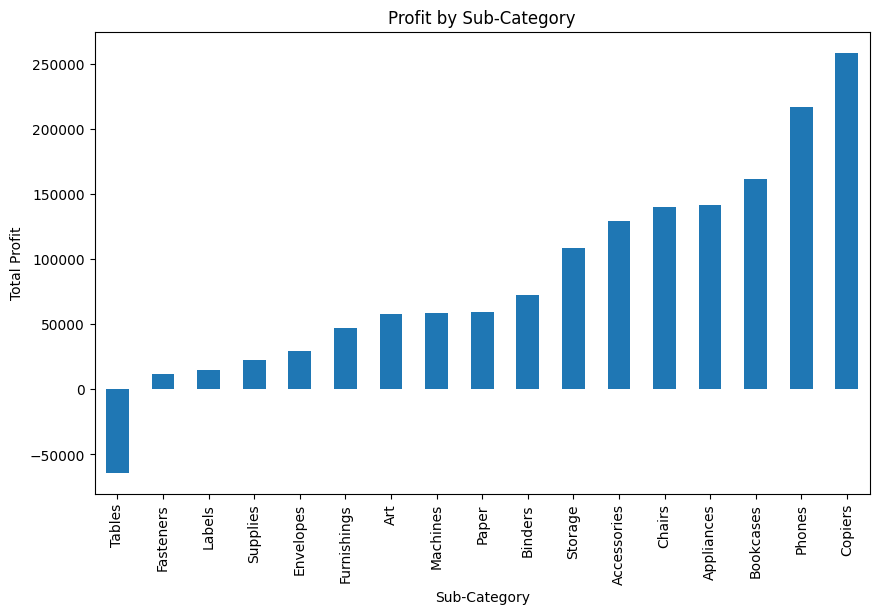

In [55]:
profit_by_sub = df.groupby('Sub.Category')['Profit'].sum().sort_values()


profit_by_sub.plot(kind='bar', figsize=(10,6))
plt.title("Profit by Sub-Category")
plt.xlabel("Sub-Category")
plt.ylabel("Total Profit")
plt.show()

## Table Summary

In [24]:
summary = df.groupby('Sub.Category')['Profit'].sum().reset_index().sort_values(by='Profit')
summary


,Sub.Category,Profit
16,Tables,-64083.38870
8,Fasteners,11525.42410
10,Labels,15010.51200
15,Supplies,22583.26310
7,Envelopes,29601.11630
9,Furnishings,46967.42550
2,Art,57953.91090
11,Machines,58867.87300
12,Paper,59207.68270
3,Binders,72449.84600


## Summary – Q1) Which Product Categories Generate the Most Sales?
The analysis of sales across product categories shows that Technology generates the highest total sales, making it the strongest revenue-driving category for the business. Furniture ranks second, contributing a moderate share of total sales. On the other hand, Office Supplies accounts for the lowest sales volume, indicating comparatively lower demand or smaller transaction sizes.
Overall, the company should focus on expanding and promoting Technology products, while re-evaluating pricing, marketing, or bundling strategies for Office Supplies to increase performance.

___


### Q#2: Which cities/states buy the most?

In [ ]:
top_states = df.groupby('State')['Sales'].sum().sort_values(ascending=False).head(10)
top_states


State
England                   485166
California                457731
Ile-de-France             317818
New York                  310914
New South Wales           270509
Queensland                238311
North Rhine-Westphalia    216458
Texas                     170187
San Salvador              153648
National Capital          152185
Name: Sales, dtype: int64

### Q2) Which States  Buy the Most?

Below are the total sales contributions for each state .  
To avoid overcrowded visualizations, charts display only the top-performing locations, 
while full sales lists are shown in table format for complete analysis.



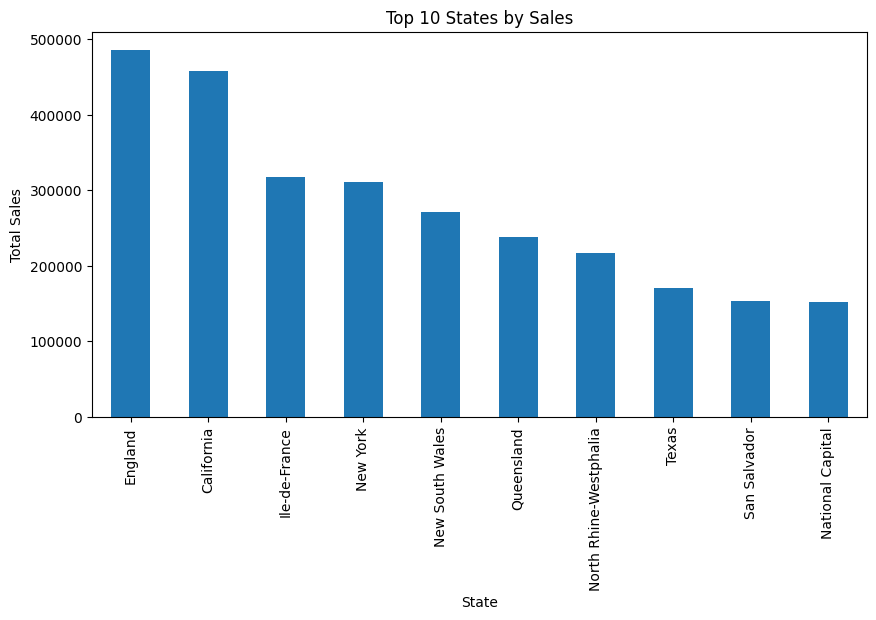

In [35]:
top_states.head(10).plot(kind='bar', figsize=(10,5))
plt.title("Top 10 States by Sales")
plt.xlabel("State")
plt.ylabel("Total Sales")
plt.show()


## Summary – Q2) Which States Buy the Most
The sales analysis by state shows that some states contribute significantly more to total revenue than others. States with large populations and strong commercial activity, such as California, New York, and Texas, generate the highest sales, indicating strong customer demand and business presence in these regions.
Meanwhile, smaller or less commercially active states contribute lower sales volumes. This suggests that marketing and distribution efforts should remain focused on high-demand states, while exploring growth opportunities in underperforming regions.

___

### Q2) Which Cities Buy the Most?




In [36]:
city_sales = df.groupby('City')['Sales'].sum().sort_values(ascending=False).head(10)
city_sales

City
New York City    256397
Los Angeles      175857
Manila           120896
Seattle          119552
San Francisco    112690
Philadelphia     109085
Sydney           101952
Jakarta           94318
London            86945
Mexico City       85732
Name: Sales, dtype: int64

### Q2) Which  Cities Buy the Most?

Below are the total sales contributions for each  city.  
To avoid overcrowded visualizations, charts display only the top-performing locations, 
while full sales lists are shown in table format for complete analysis.


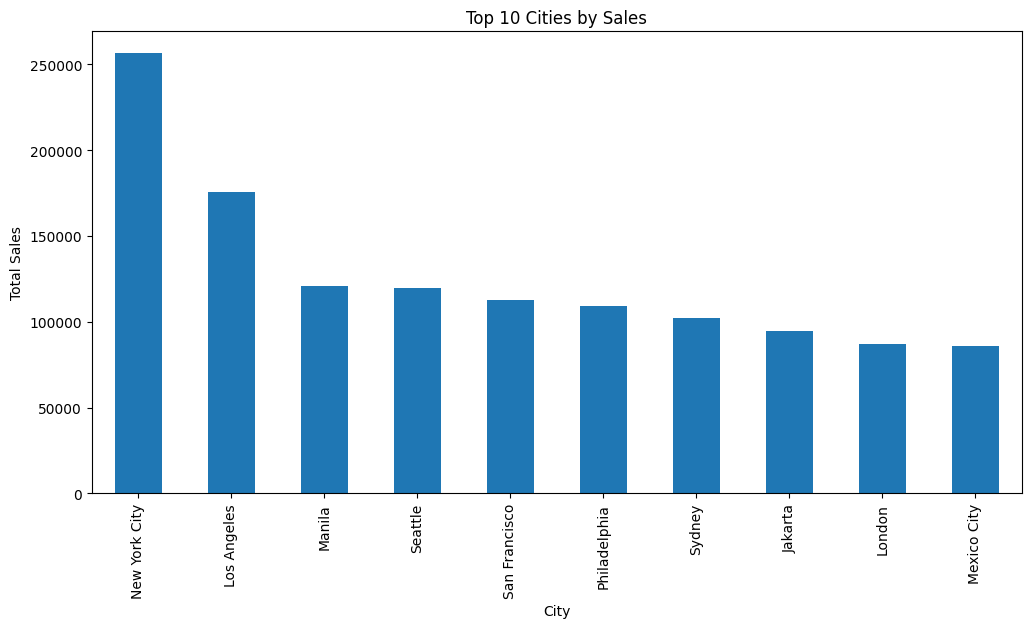

In [38]:
city_sales.head(10).plot(kind='bar', figsize=(12,6))
plt.title("Top 10 Cities by Sales")
plt.xlabel("City")
plt.ylabel("Total Sales")
plt.show()

## Summary – Q2 (Cities): Which Cities Buy the Most 
The analysis of sales by city shows that major metropolitan and business-centered cities generate the highest revenue. Cities with larger populations and strong commercial markets contribute more to total sales compared to smaller towns. This indicates that demand is concentrated in urban regions, where customer purchasing activity and business operations are higher.
These findings suggest that the company should continue prioritizing marketing, distribution, and customer engagement strategies in high-demand metropolitan cities, while evaluating targeted outreach strategies to gradually increase sales in smaller cities.

___

### Q#3 Which months have highest and lowest sales (seasonal trend)?

In [41]:
df['Month'] = df['Order.Date'].dt.month 


In [42]:
monthly_sales = df.groupby('Month')['Sales'].sum().sort_values(ascending=False)
monthly_sales

Month
12    1580816
11    1551319
9     1437432
8     1293852
6     1269751
10    1168220
5      904061
3      770519
7      749423
4      698603
1      675141
2      543768
Name: Sales, dtype: int64

### Q3) Monthly Sales Trend (Seasonality)
This chart shows how sales vary across months. It helps identify seasonal peaks and slow periods. 
High sales months represent strong demand seasons, while low sales months indicate slower business activity.

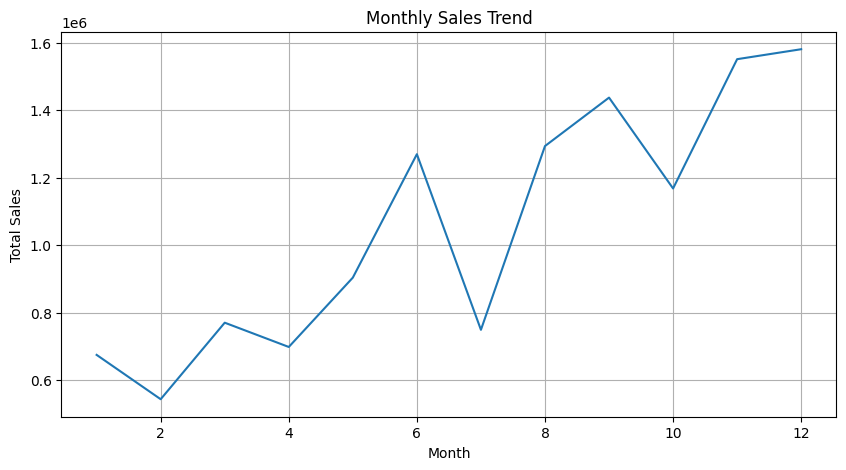

In [45]:
monthly_sales.sort_index().plot(kind='line', figsize=(10,5))
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.grid()
plt.show()

In [46]:
monthly_sales

Month
12    1580816
11    1551319
9     1437432
8     1293852
6     1269751
10    1168220
5      904061
3      770519
7      749423
4      698603
1      675141
2      543768
Name: Sales, dtype: int64

### Summary – Q3) Which Months Have the Highest and Lowest Sales?
The monthly sales analysis reveals a clear seasonal pattern in customer purchasing behavior.
Sales tend to peak in the later months of the year (especially during November and December), likely due to holiday shopping and year-end business purchases.
In contrast, the lowest sales generally occur during the early months of the year, such as January and February, when customer spending is typically lower after the holiday season.

___

### 4 Which products are profitable vs unprofitable?

### Summary – Q4) Which Products Are Profitable vs Unprofitable?
The profit analysis by product sub-category shows a clear contrast in performance.
Copiers are the most profitable sub-category, contributing significantly to overall profit margins. This indicates strong demand and efficient pricing for copier products.

On the other hand, Tables consistently generate losses, making them the least profitable sub-category. This may be due to high production or shipping costs, heavy discounts, or low market demand.

# Implications:
The company should continue promoting and investing in copier products to sustain profit growth.

The pricing, cost structure, or discount strategy for Tables should be reviewed to reduce losses or improve profit margins.

___

## Q5 → Which customer segment buys the most?

### Summary – Q5) Which Customer Segment Buys the Most?
The sales analysis by customer segment shows that the Consumer segment contributes the highest share of total sales, followed by the Corporate segment. The Home Office segment accounts for the smallest portion of sales.

This indicates that individual retail consumers are the primary target market, purchasing more frequently and in higher volumes. Corporate customers also contribute significantly, but at a lower scale. The Home Office segment represents a smaller, more specialized customer group.

# Implications:
The company should continue focusing marketing and promotional efforts on the Consumer segment, where demand is strongest.

Opportunities may exist to expand Corporate and Home Office sales through business-focused offers, loyalty programs, or bulk purchase incentives.

___

#  Final Summary of Insights (Conclusion)
### The Superstore dataset analysis highlights several key business patterns:
### 1. Top-Selling Product Categories:
#### . Technology generated the highest sales, followed by Furniture and Office Supplies.
#### . However, higher sales did not always result in higher profits.
### 2. Profitability by Sub-Category:
#### . Copiers, Phones, and Bookcases were among the most profitable sub-categories.
#### . Tables showed significant losses, indicating pricing or cost issues.
### 3. Geographical Sales Performance:
#### . California and New York emerged as the top revenue-generating states.
#### . Across cities, New York City and Los Angeles recorded the highest sales, reflecting strong customer bases and economic activity.
### 4. Seasonal Trends:
#### . Sales tend to peak in November and December, influenced by holiday shopping and year-end corporate budgets.
#### . The lowest sales generally occur during February, indicating slower retail activity early in the year.
### 5. Customer Segment Insights:
#### . Consumer Segment made the highest number of purchases, followed by Corporate and Home Office customers.
#### . Marketing efforts toward consumers can further increase sales growth.

------